In [3]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset
dataset = pd.read_csv("dataseter.csv")

# Display dataset details
print(dataset.head())
print(dataset.info())
print(dataset.shape)
print(dataset.isnull().sum())


  GENDER  AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC_DISEASE  \
0      M   65     Yes            Yes     Yes            No              No   
1      F   55     Yes             No      No           Yes             Yes   
2      F   78      No             No     Yes           Yes             Yes   
3      M   60      No            Yes     Yes           Yes              No   
4      F   80     Yes            Yes      No           Yes             Yes   

  FATIGUE ALLERGY WHEEZING ALCOHOL_CONSUMING COUGHING SHORTNESS_OF_BREATH  \
0     Yes      No       No                No       No                  No   
1      No      No       No               Yes      Yes                 Yes   
2      No     Yes       No               Yes      Yes                  No   
3     Yes      No      Yes               Yes       No                 Yes   
4      No     Yes       No               Yes      Yes                 Yes   

  SWALLOWING_DIFFICULTY CHEST_PAIN LUNG_CANCER  
0                  

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode binary columns
binary_cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
               'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
               'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 
               'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER']

le = LabelEncoder()
for col in binary_cols:
    dataset[col] = le.fit_transform(dataset[col])

# One-hot encode 'GENDER'
dataset = pd.get_dummies(dataset, columns=['GENDER'], drop_first=True)
print(dataset.head())


   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC_DISEASE  \
0   65        1               1        1              0                0   
1   55        1               0        0              1                1   
2   78        0               0        1              1                1   
3   60        0               1        1              1                0   
4   80        1               1        0              1                1   

   FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0        1        0         0                  0         0   
1        0        0         0                  1         1   
2        0        1         0                  1         1   
3        1        0         1                  1         0   
4        0        1         0                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  LUNG_CANCER  \
0                    0                      0           1            0   
1                    1

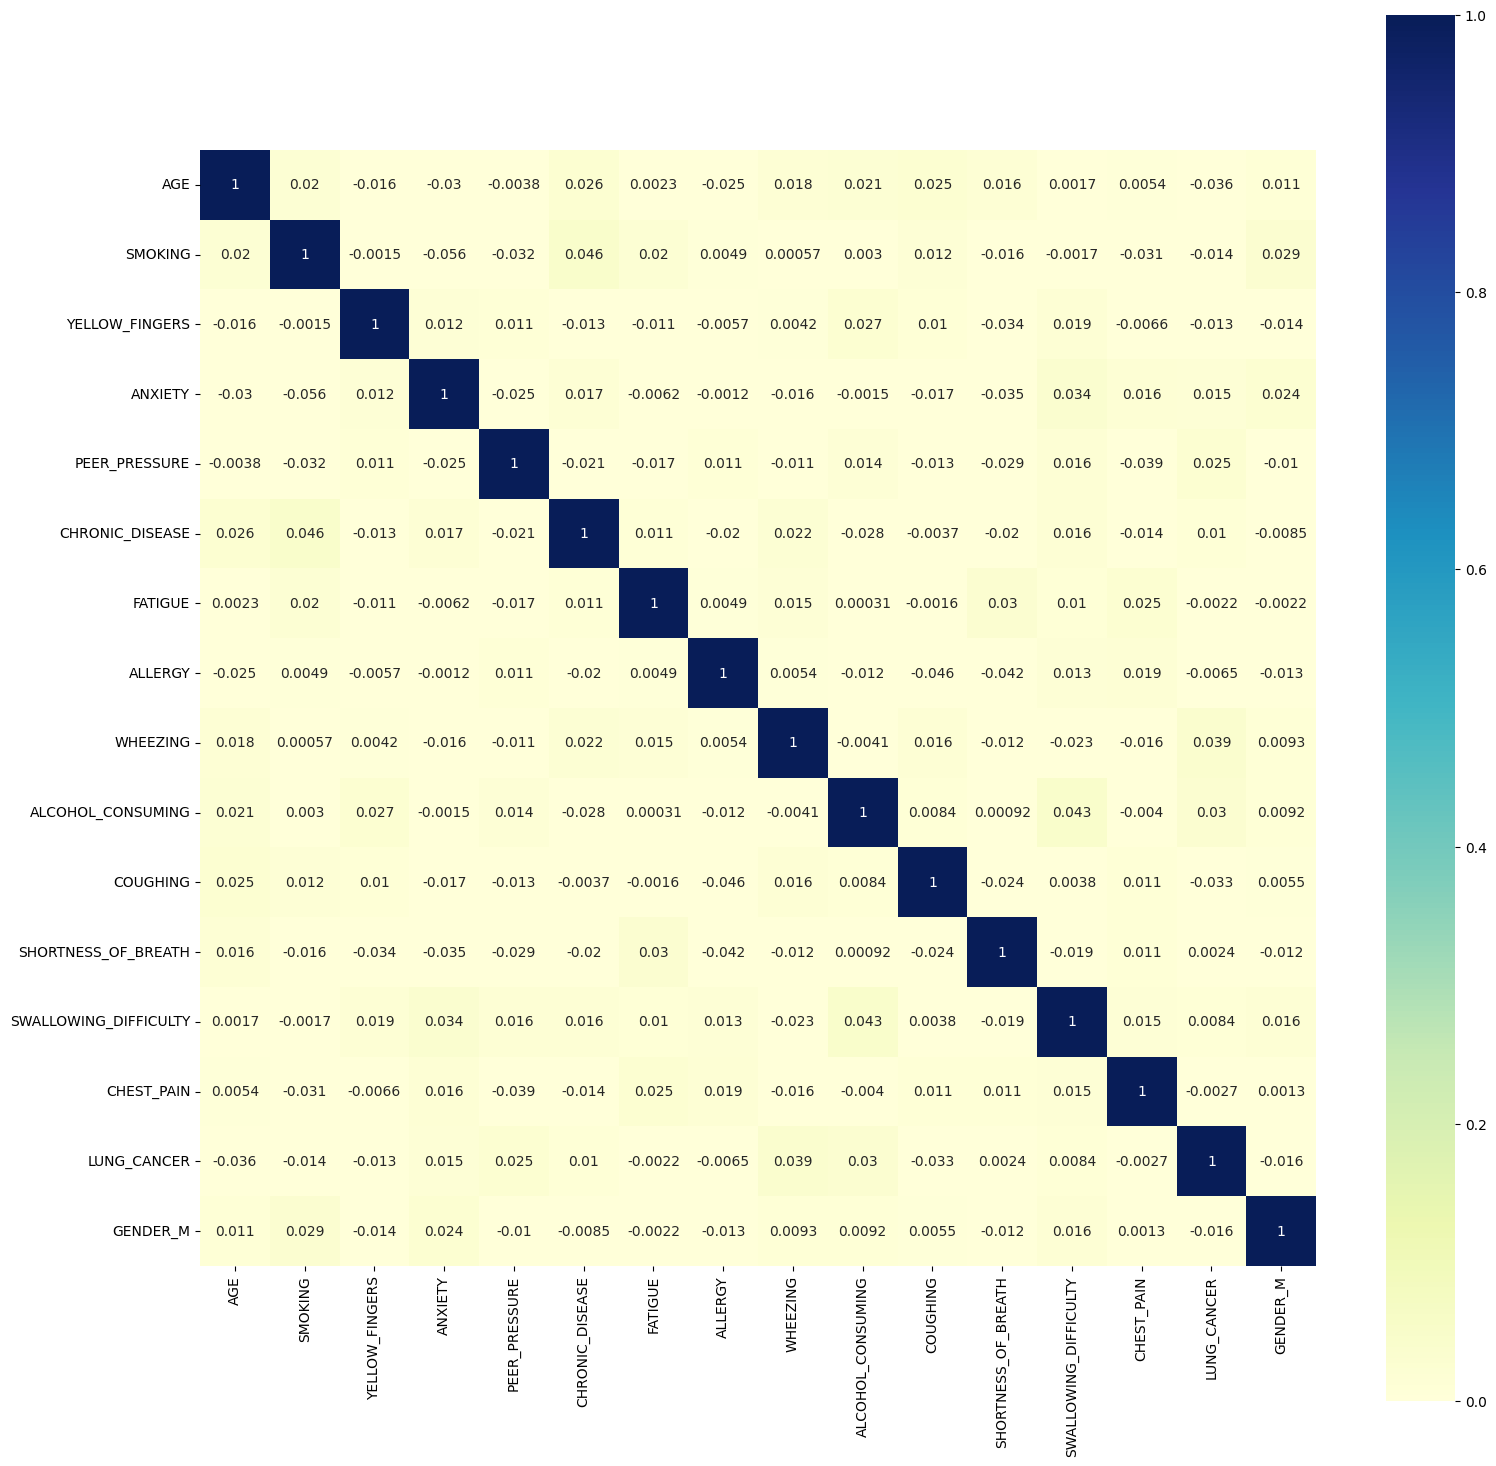

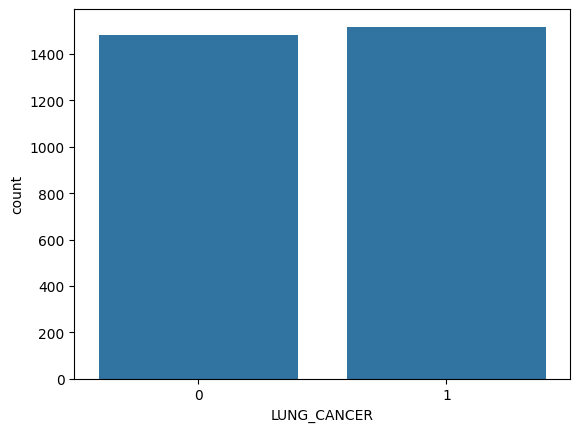

In [5]:
# Correlation matrix
corrmat = dataset.corr()

# Plot heatmap
plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, annot=True, square=True, vmin=0, vmax=1, cmap="YlGnBu")
plt.show()

# Countplot for 'LUNG_CANCER'
sns.countplot(x='LUNG_CANCER', data=dataset)
plt.show()


In [6]:
# Correlation with target variable 'LUNG_CANCER'
print(dataset.corr()["LUNG_CANCER"].abs().sort_values(ascending=False))


LUNG_CANCER              1.000000
WHEEZING                 0.038606
AGE                      0.035712
COUGHING                 0.033087
ALCOHOL_CONSUMING        0.030465
PEER_PRESSURE            0.024644
GENDER_M                 0.016114
ANXIETY                  0.014525
SMOKING                  0.014219
YELLOW_FINGERS           0.013003
CHRONIC_DISEASE          0.010235
SWALLOWING_DIFFICULTY    0.008421
ALLERGY                  0.006508
CHEST_PAIN               0.002699
SHORTNESS_OF_BREATH      0.002380
FATIGUE                  0.002249
Name: LUNG_CANCER, dtype: float64


In [7]:
# Drop less important features based on assumed threshold of 0.01
X = dataset.drop(['ALLERGY', 'CHEST_PAIN', 'SHORTNESS_OF_BREATH', 'FATIGUE', 'AGE', 'LUNG_CANCER'], axis=1)
y = dataset['LUNG_CANCER']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
# SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

SVM = SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
SVM.fit(X_train, y_train)

# Predictions
train_predictions = SVM.predict(X_train)
test_predictions = SVM.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"SVM Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"SVM Testing Accuracy: {test_accuracy * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test, test_predictions)
print(f"Confusion Matrix for SVM: \n{cm}")


SVM Training Accuracy: 62.38%
SVM Testing Accuracy: 48.33%
Confusion Matrix for SVM: 
[[136 151]
 [159 154]]


In [9]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
RF.fit(X_train, y_train)

# Predictions
train_predictions_rf = RF.predict(X_train)
test_predictions_rf = RF.predict(X_test)

# Accuracy
train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)
print(f"Random Forest Training Accuracy: {train_accuracy_rf * 100:.2f}%")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf * 100:.2f}%")

# Confusion matrix
cm_rf = confusion_matrix(y_test, test_predictions_rf)
print(f"Confusion Matrix for RF: \n{cm_rf}")


Random Forest Training Accuracy: 75.38%
Random Forest Testing Accuracy: 47.83%
Confusion Matrix for RF: 
[[134 153]
 [160 153]]


In [10]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN.fit(X_train, y_train)

# Predictions
train_predictions_knn = KNN.predict(X_train)
test_predictions_knn = KNN.predict(X_test)

# Accuracy
train_accuracy_knn = accuracy_score(y_train, train_predictions_knn)
test_accuracy_knn = accuracy_score(y_test, test_predictions_knn)
print(f"KNN Training Accuracy: {train_accuracy_knn * 100:.2f}%")
print(f"KNN Testing Accuracy: {test_accuracy_knn * 100:.2f}%")

# Confusion matrix
cm_knn = confusion_matrix(y_test, test_predictions_knn)
print(f"Confusion Matrix for KNN: \n{cm_knn}")


KNN Training Accuracy: 69.71%
KNN Testing Accuracy: 49.50%
Confusion Matrix for KNN: 
[[142 145]
 [158 155]]


In [11]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)

# Predictions
train_predictions_log = log.predict(X_train)
test_predictions_log = log.predict(X_test)

# Accuracy
train_accuracy_log = accuracy_score(y_train, train_predictions_log)
test_accuracy_log = accuracy_score(y_test, test_predictions_log)
print(f"Logistic Regression Training Accuracy: {train_accuracy_log * 100:.2f}%")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_log * 100:.2f}%")

# Confusion matrix
cm_log = confusion_matrix(y_test, test_predictions_log)
print(f"Confusion Matrix for Logistic Regression: \n{cm_log}")


Logistic Regression Training Accuracy: 53.96%
Logistic Regression Testing Accuracy: 50.33%
Confusion Matrix for Logistic Regression: 
[[135 152]
 [146 167]]


In [12]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=6, random_state=0)
decision_tree.fit(X_train, y_train)

# Predictions
train_predictions_dc = decision_tree.predict(X_train)
test_predictions_dc = decision_tree.predict(X_test)

# Accuracy
train_accuracy_dc = accuracy_score(y_train, train_predictions_dc)
test_accuracy_dc = accuracy_score(y_test, test_predictions_dc)
print(f"Decision Tree Training Accuracy: {train_accuracy_dc * 100:.2f}%")
print(f"Decision Tree Testing Accuracy: {test_accuracy_dc * 100:.2f}%")

# Confusion matrix
cm_dc = confusion_matrix(y_test, test_predictions_dc)
print(f"Confusion Matrix for Decision Tree: \n{cm_dc}")


Decision Tree Training Accuracy: 60.00%
Decision Tree Testing Accuracy: 47.67%
Confusion Matrix for Decision Tree: 
[[129 158]
 [156 157]]


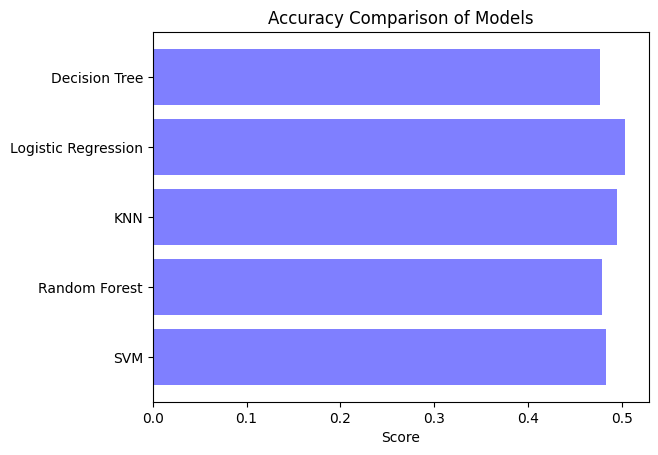

In [13]:
# Accuracy scores
scores = [test_accuracy, test_accuracy_rf, test_accuracy_knn, test_accuracy_log, test_accuracy_dc]
classifiers = ['SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Decision Tree']

# Visualization
y_pos = np.arange(len(classifiers))
plt.barh(y_pos, scores, align='center', alpha=0.5, color='blue')
plt.yticks(y_pos, classifiers)
plt.xlabel('Score')
plt.title('Accuracy Comparison of Models')
plt.show()


In [18]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk

def predict():
    # Get user input from entry fields
    inputs = []
    try:
        for entry in entries:
            value = float(entry.get())
            inputs.append(value)
        
        # Scale input
        inputs_scaled = scaler.transform([inputs])

        # Predict using the trained Random Forest model
        prediction = RF.predict(inputs_scaled)

        # Show the prediction result
        result = "Lung Cancer Detected" if prediction[0] == 1 else "No Lung Cancer"
        messagebox.showinfo("Prediction Result", result)

        # Close the application after showing the result
        root.quit()  # This will close the GUI

    except ValueError:
        messagebox.showerror("Input Error", "Please enter valid numeric values.")

# Create a simple GUI window
root = tk.Tk()
root.title("Lung Cancer Prediction")
root.geometry("500x600")
root.configure(bg="#e9ecef")

# Create a title label
title_label = tk.Label(root, text="Lung Cancer Prediction", font=("Helvetica", 18, "bold"), bg="#e9ecef", fg="#343a40")
title_label.pack(pady=20)

# Create a frame for the canvas and scrollbar
frame = tk.Frame(root)
frame.pack(pady=10, fill="both", expand=True)

# Create a canvas for the input fields
canvas = tk.Canvas(frame, bg="#ffffff")
scrollbar = tk.Scrollbar(frame, orient="vertical", command=canvas.yview)
scrollable_frame = tk.Frame(canvas, bg="#ffffff")

# Configure the scrollbar
scrollable_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
)

# Create a window in the canvas for the scrollable frame
canvas.create_window((0, 0), window=scrollable_frame, anchor="nw")

# Configure scrollbar and pack canvas
canvas.configure(yscrollcommand=scrollbar.set)
canvas.pack(side="left", fill="both", expand=True)
scrollbar.pack(side="right", fill="y")

# Create labels and entries for each feature
feature_names = X.columns.tolist()
entries = []

for feature in feature_names:
    label = tk.Label(scrollable_frame, text=feature, font=("Helvetica", 12), bg="#ffffff", fg="#343a40")
    label.pack(pady=5)

    entry = tk.Entry(scrollable_frame, font=("Helvetica", 12), width=25, bd=2, relief="groove")
    entry.pack(pady=5)
    entries.append(entry)

# Create a frame for buttons at the bottom
button_frame = tk.Frame(root, bg="#e9ecef")
button_frame.pack(side="bottom", fill="x", padx=10, pady=10)

# Create a predict button with styling
predict_button = ttk.Button(button_frame, text="Predict", command=predict)
predict_button.pack(side="left", padx=20)

# Create an exit button
exit_button = ttk.Button(button_frame, text="Exit", command=root.quit)
exit_button.pack(side="right", padx=20)

# Run the GUI
root.mainloop()


: 